Neural Network-based Classifier
===============================

In [1]:
%run -i import_libraries.py
from prediction_plotting import*

## Preprocessing Eigenvalues to NN input
In this first step, we load the preprocessed data (i.e., eigenvalues and labels) computed in the previous step.

In [2]:
# Loading normalized eigenvalues
with open("99_Data/df_normalized_eigenvalues.pkl", 'rb') as f:
    df_normalized_eigenvalues = pickle.load(f)
# Loading normalized eigenvalue labels
with open("99_Data/normalized_ground_truth_data.pkl", 'rb') as f:
    normalized_ground_truth_data = pickle.load(f)

tag_labels = normalized_ground_truth_data['tag_label']
damping_ratio = normalized_ground_truth_data['damping_ratio']

We must rearrange the eigenvalues in a format suitable to the neural network. The `TensorFlow` library does not accept complex inputs. Therefore, eigenvalues must be arranged into a two-feature input representing the real and the imaginary part of each eigenvalue.

In [3]:
# Flattening eigs19branches
eigs_flatten = np.reshape(np.transpose(df_normalized_eigenvalues.values),
                          [df_normalized_eigenvalues.values.shape[0]*df_normalized_eigenvalues.values.shape[1], 1])
print(f"eigs_flatten (shape) = {eigs_flatten.shape}")
      
# Initializing input features matrix
input_features = np.zeros((eigs_flatten.shape[0], 2))

# Populating the input features matrix with the real and imaginary part of the eigenvalues, respectively
for row in range(eigs_flatten.shape[0]):
    input_features[row][0] = np.real(eigs_flatten[row])
    input_features[row][1] = np.imag(eigs_flatten[row])
print(f"input_features (shape)= {input_features.shape}")

# Flattening tag labels (ground truth)
input_labels = np.reshape(np.transpose(tag_labels), [tag_labels.shape[0]*tag_labels.shape[1], 1])
print(f"input_labels = {input_labels.shape}")

# Extracting training and testing data using scikit learn functionalities
X_train, X_test, Y_train, Y_test = train_test_split(input_features, input_labels, random_state = 0)

print(f"Train data = {X_train.shape}")
print(f"Train labels = {Y_train.shape}")
print(f"Test data = {X_test.shape}")
print(f"Test labels = {Y_test.shape}")

# Converting labels to one-hot encoding
lb = LabelBinarizer()

T_train = np.float32(lb.fit_transform(Y_train))
T_train = np.float32(lb.transform(Y_train))

T_test = np.float32(lb.fit_transform(Y_train))
T_test = np.float32(lb.transform(Y_test))

print(f"Train labels (one hot encoding) = {T_train.shape}")
print(f"Test labels (one hot encoding) = {T_test.shape}")

eigs_flatten (shape) = (970935, 1)
input_features (shape)= (970935, 2)
input_labels = (970935, 1)
Train data = (728201, 2)
Train labels = (728201, 1)
Test data = (242734, 2)
Test labels = (242734, 1)
Train labels (one hot encoding) = (728201, 6)
Test labels (one hot encoding) = (242734, 6)


The raw eigenvalue dataset is naturally skewed since there are categories much more frequent than others. To avoid this problem, and given the large amount of data available, we make the training set balanced by selecting the same amount of training instances for each classification group. The reduced balanced training set has 34116 entries.

In [4]:
# Taking the same amount of eigenvalues for the training part
unique, counts = np.unique(Y_train, return_counts=True)
print(dict(zip(unique, counts)))

numeigs_1 = np.where(Y_train == 1)
numeigs_1 = np.array(numeigs_1)
numeigs_1 = numeigs_1[0,:]

numeigs_2 = np.where(Y_train == 2)
numeigs_2 = np.array(numeigs_2)
numeigs_2 = numeigs_2[0,:]

numeigs_3 = np.where(Y_train == 3)
numeigs_3 = np.array(numeigs_3)
numeigs_3 = numeigs_3[0,:]

numeigs_4 = np.where(Y_train == 4)
numeigs_4 = np.array(numeigs_4)
numeigs_4 = numeigs_4[0,:]

numeigs_5 = np.where(Y_train == 5)
numeigs_5 = np.array(numeigs_5)
numeigs_5 = numeigs_5[0,:]

numeigs_6 = np.where(Y_train == 6)
numeigs_6 = np.array(numeigs_6)
numeigs_6 = numeigs_6[0,:]

# Randomizing indexes
numeigs_r_1 = np.random.choice(numeigs_1, np.amin(counts))
numeigs_r_2 = np.random.choice(numeigs_2, np.amin(counts))
numeigs_r_3 = np.random.choice(numeigs_3, np.amin(counts))
numeigs_r_4 = np.random.choice(numeigs_4, np.amin(counts))
numeigs_r_5 = np.random.choice(numeigs_5, np.amin(counts))
numeigs_r_6 = np.random.choice(numeigs_6, np.amin(counts))

X_train_red = np.concatenate((X_train[numeigs_r_1,...], X_train[numeigs_r_2,...], \
                             X_train[numeigs_r_3,...], X_train[numeigs_r_4,...], X_train[numeigs_r_5,...], 
                             X_train[numeigs_r_6,...]), axis = 0)
print(f"X_train_red = {X_train_red.shape}")

Y_train_red = np.concatenate((Y_train[numeigs_r_1,...], Y_train[numeigs_r_2,...], \
                             Y_train[numeigs_r_3,...], Y_train[numeigs_r_4,...], Y_train[numeigs_r_5,...],
                             Y_train[numeigs_r_6,...]), axis = 0)
print(f"Y_train_red = {Y_train_red.shape}")

T_train_red = np.concatenate((T_train[numeigs_r_1,...], T_train[numeigs_r_2,...], \
                             T_train[numeigs_r_3,...], T_train[numeigs_r_4,...], T_train[numeigs_r_5,...],
                             T_train[numeigs_r_6,...]), axis = 0)
print(f"T_train_red = {T_train_red.shape}")

normalized_testing_training_data_red = {'X_train' : X_train,
                                        'X_train_red': X_train_red,
                                   'Y_train_red': Y_train_red,
                                   'T_train_red': T_train_red,
                                    'X_test' : X_test,
                                    'Y_test' : Y_test}

with open('99_Data/normalized_testing_training_data_red.pkl', 'wb') as f:
    pickle.dump(normalized_testing_training_data_red, f, pickle.HIGHEST_PROTOCOL)

{1.0: 36843, 2.0: 25312, 3.0: 5686, 4.0: 207371, 5.0: 439513, 6.0: 13476}
X_train_red = (34116, 2)
Y_train_red = (34116, 1)
T_train_red = (34116, 6)


## Neural Network Architecture

The NN consists of six fully-connected layers, four of them with learning parameters. Two dropout layers are added to reduce overfitting and improve generalization performance. The input layer and the two hidden layers employ a ReLU unit as an activation function. Since this is a multi-class classification problem, a softmax activation function is suitable as an output activation. 

In [24]:
%run -i neural_network.py
NNEigenvalueClassification(X_train_red, T_train_red, X_test, T_test, X_train, T_train, learning_rate = 0.001, num_epochs = 200, minibatch_size = 750)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:1 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:2 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:3 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:05:00.0, compute capability: 6.1
/job:localhost/replica:0/task:0/device:GPU:1 -> device: 1, name: GeForce GTX 1080 Ti, pci bus id: 0000:06:00.0, compute capability: 6.1
/job:localhost/replica:0/task:0/device:GPU:2 -> device: 2, name: GeForce GTX 1080 Ti, pci bus id: 0000:09:00.0, compute capability: 6.1
/job:localhost/replica:0/task:0/device:GPU:3 -> device: 3, name: GeForce GTX 1080 Ti, pci bus id: 0000:0a:00.0, compute capability: 6.1

2020-06-13 16:58:16
Num of minibatches: 45
Loss after epoch 1 = 

The training information is shown below:

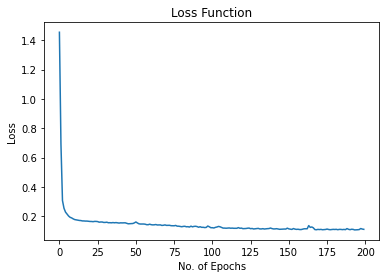

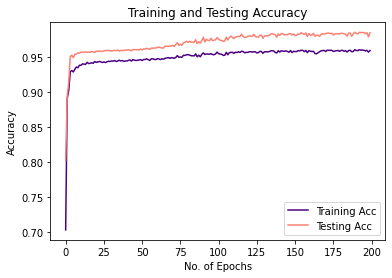

<Figure size 432x288 with 0 Axes>

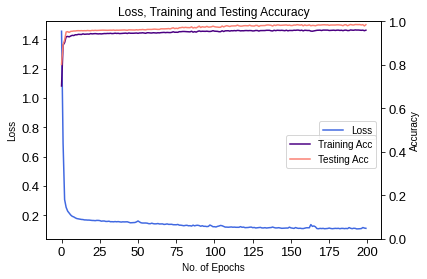

In [21]:
plot_nn_performance_info()

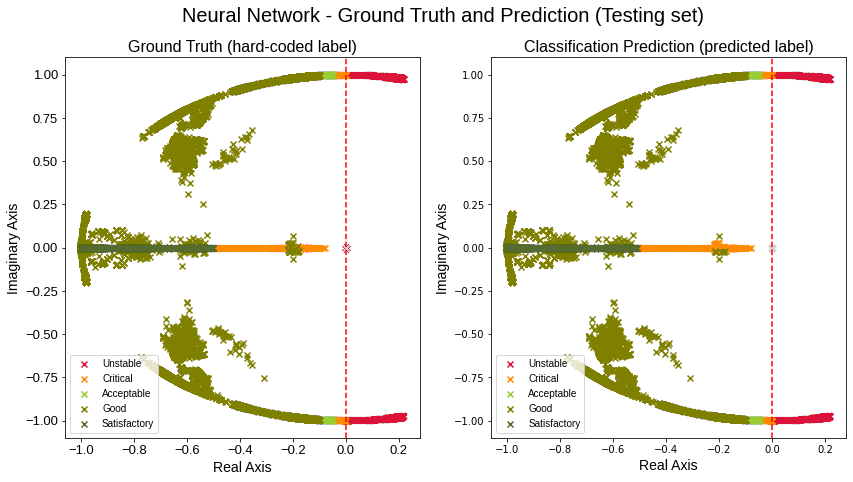

In [22]:
with open('99_Data/output_NN_test.pkl', 'rb') as f:
    y_pred = pickle.load(f)

prediction_plotting(X_test, Y_test, y_pred + 1, "Neural Network")

In [23]:
print(confusion_matrix(Y_test, y_pred + 1))
print(precision_score(Y_test, y_pred + 1, average = 'macro'))
print(recall_score(Y_test, y_pred + 1, average = 'macro'))

[[  9538      4      0      0      0   2917]
 [     0   8265     45      0      0      0]
 [     0      0   1874      2      0      0]
 [     0     17     43  68334    625      0]
 [     0     53      0      0 146564      0]
 [     0      0      0      0      0   4453]]
0.9243674292995591
0.9581305762340576
